In [12]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency  import psd_array_multitaper
from mne.io import RawArray
from mne.time_frequency import tfr_array_morlet

print(__doc__)

Automatically created module for IPython interactive environment


In [14]:
epilepsy = "epilepsy/aaaaaanr_s001_t001.edf"
no_epilepsy = "no_epilepsy/aaaaaebo_s001_t000.edf"

In [15]:
raw1 = mne.io.read_raw_edf(epilepsy, preload=True)
raw2 = mne.io.read_raw_edf(no_epilepsy, preload=True)

Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy\aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\no_epilepsy\aaaaaebo_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 318749  =      0.000 ...  1274.996 secs...


In [19]:
channel_index = 4

In [20]:
channel_data1 = raw1.get_data(picks=[channel_index])
channel_data2 = raw2.get_data(picks=[channel_index])

In [18]:
raw1.filter(10,50, method="iir")
raw2.filter(10,50, method="iir")

raw1.notch_filter(freqs=[50], method='iir')
raw2.notch_filter(freqs=[50], method='iir')

ica = mne.preprocessing.ICA(n_components=4, max_iter='auto', random_state=0)
ica.fit(raw1)
ica.apply(raw1)

ica.fit(raw2)
ica.apply(raw2)


# Apply SSP to remove remaining artifacts
# raw1.apply_proj()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 10.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 10.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up b

C:\Users\PC\AppData\Local\Temp\ipykernel_8176\759497846.py:8: RuntimeWarning: Using n_components=4 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (1.6e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw1)


Selecting by number: 4 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 41 PCA components


C:\Users\PC\AppData\Local\Temp\ipykernel_8176\759497846.py:11: RuntimeWarning: Using n_components=4 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (1.3e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw2)


Measurement date,"January 01, 2006 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaebo
Digitized points,Not available
Good channels,41 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,10.00 Hz
Lowpass,50.00 Hz


In [21]:
sfreq1 = raw1.info['sfreq']
sfreq2 = raw2.info['sfreq']

In [22]:
psd1, freqs1 = mne.time_frequency.psd_array_multitaper(channel_data1[0], sfreq1, fmin=1, fmax=500)
psd2, freqs2 = mne.time_frequency.psd_array_multitaper(channel_data2[0], sfreq2, fmin=1, fmax=500)

    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\PC\AppData\Local\Temp\ipykernel_8176\1431096846.py:1: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd1, freqs1 = mne.time_frequency.psd_array_multitaper(channel_data1[0], sfreq1, fmin=1, fmax=500)


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\PC\AppData\Local\Temp\ipykernel_8176\1431096846.py:2: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd2, freqs2 = mne.time_frequency.psd_array_multitaper(channel_data2[0], sfreq2, fmin=1, fmax=500)


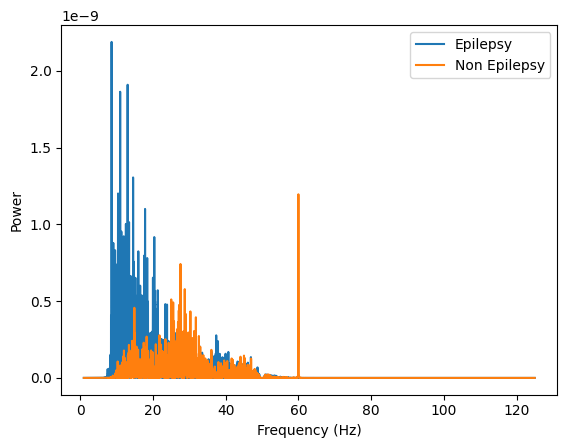

In [23]:
# plt.figure(figsize=(20, 5))

# plt.plot(freqs1, psd1, label=f"File 1", linestyle='--')
# plt.plot(freqs2, psd2, label=f"File 2", linestyle='-')

plt.plot(freqs1, psd1, label=f"Epilepsy")
plt.plot(freqs2, psd2, label=f"Non Epilepsy")


plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()

# plt.axvline(x=peak_freq1_value, color='red', linestyle='-', label=f"Peak 1: {peak_freq1_value:.2f} Hz")
# plt.axvline(x=peak_freq2_value, color='blue', linestyle='--', label=f"Peak 2: {peak_freq2_value:.2f} Hz")
plt.legend()

plt.show()